## **Imports**

In [2]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2
from IPython.display import Image

%matplotlib inline
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [ ]:
!unzip val.zip

## **Loading created models**

In [ ]:
model_path = '/content/age_model.h5'
age_model = load_model(model_path) # loading the model

# summarize model
age_model.summary()

In [ ]:
model_path = '/content/gender_model.h5'
gender_model = load_model(model_path) # loading the model

# summarize model
gender_model.summary()

In [ ]:
model_path = '/content/emotion_model.h5'
emotion_model = load_model(model_path) # loading the model

# summarize model
emotion_model.summary()

## **Defining labels for all categories**

In [10]:
# possible values for labels for each of three categories

age_labels = ['0-14', '15-24', '25-64', '65-10']
gender_labels = ['male', 'female']
emotion_labels= ['happy','neutral','angry']

## **Loading Images**

In [11]:
img_paths = []

img_path = "/content/val/httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg"
img_paths.append(img_path)
img_path = "/content/val/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTENDgMDUODczNDcNTcjpg.jpg"
img_paths.append(img_path)
img_path = "/content/val/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTEODAOTcxNjcMjczMjkzjpg.jpg"
img_paths.append(img_path)
img_path = "/content/val/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIOTcwODQNTUzNjQMzcjpg.jpg"
img_paths.append(img_path)
img_path = "/content/val/httpassetsrollingstonecomassetsarticlemadonnadavidbowiechangedthecourseofmylifeforeversmallsquarexmadonnabowiejpg.jpg"
img_paths.append(img_path)

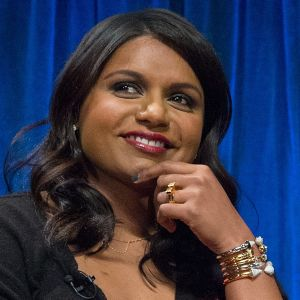

In [12]:
pil_img = Image(filename=img_paths[3])
display(pil_img)

## **Prediction for Age/Gender/Emotion**

1/1 [==============================] - 0s 88ms/step
1: male, 25-64, neutral


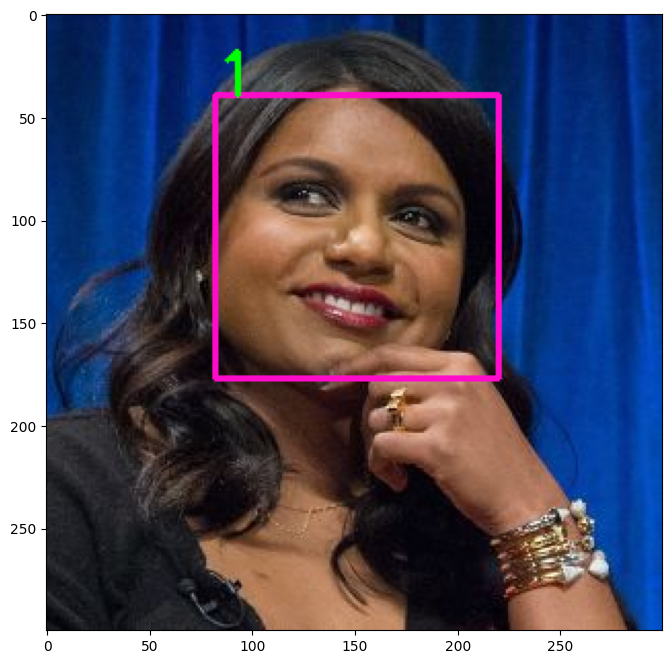

In [15]:
test_image = cv2.imread(img_paths[3]) # loading the image for processing
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) # convert the image to grayscale for face detection
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml') # loading the face cascade classifier
faces = face_cascade.detectMultiScale(gray, 1.3, 5) # detect faces in the grayscale image (the result are face coordinates - x, y, width, height)

i = 0

# processing each detected face
for (x, y, w, h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x, y),(x + w, y + h), (203, 12, 255), 2) # draw a rectangle around each detected face

  img_gray = gray[y:y + h, x:x + w]  # extract the face region in grayscale

  # analyze emotions
  emotion_img = cv2.resize(img_gray, (100, 100), interpolation=cv2.INTER_AREA)  # resize the image for emotion analysis
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion = emotion_labels[np.argmax(emotion_model.predict(emotion_input))]  # predict the emotion label

   # analyze gender
  gender_img = cv2.resize(img_gray, (100, 100), interpolation=cv2.INTER_AREA)  # resize the image for gender analysis
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender = gender_labels[np.argmax(gender_model.predict(gender_input))]  # predict the gender label

   # analyze age
  age_image = cv2.resize(img_gray, (100, 100), interpolation=cv2.INTER_AREA)  # resize the image for age analysis
  age_input = age_image.reshape(-1, 100, 100, 1)
  output_age = age_labels[np.argmax(age_model.predict(age_input))]  # predict the age label

  # display predictions
  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)

  col = (0,255,0)

  cv2.putText(test_image, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)  # face counter

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
